This is where i started. Cleaning and exploring data ad trying to build a regression model. Jeopardy 1b is where i look at this
as a muti-output regression with the question values as labels. 

In [244]:
import pandas as pd
jepordy_json_file = (r'C:\Users\Jodre\Downloads\Jeopardy_Questions1.json')
jepordy_json = pd.read_json(jepordy_json_file, convert_dates=True)
jepordy_json.head()


Train a model to predict the monetary value of a question (you may use the answer to the question)

In [ ]:
jepordy_json.shape
data = jepordy_json

changing the type of value to string 

In [245]:
intval = data['value'].str.split('$').str[-1]
data['intvalue'] = intval
data


,category,air_date,question,value,answer,round,show_number,intvalue
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680,200
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680,200
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680,200
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680,200
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680,200
...,...,...,...,...,...,...,...,...
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,$2000,Turandot,Double Jeopardy!,4999,2000
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,$2000,a titmouse,Double Jeopardy!,4999,2000
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",$2000,Clive Barker,Double Jeopardy!,4999,2000
216928,QUOTATIONS,2006-05-11,"'From Ft. Sill, Okla. he made the plea, Arizon...",$2000,Geronimo,Double Jeopardy!,4999,2000


formating and changing types 

In [247]:
data["intvalu"]=data["intvalue"].str.replace(',','')
data["intval"] = pd.to_numeric(data.intvalu)
data["showNumber"] = pd.to_numeric(data.show_number)
data



,category,air_date,question,value,answer,round,show_number,intvalue,intvalu,intval,showNumber
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680,200,200,200.0,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680,200,200,200.0,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680,200,200,200.0,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680,200,200,200.0,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680,200,200,200.0,4680
...,...,...,...,...,...,...,...,...,...,...,...
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,$2000,Turandot,Double Jeopardy!,4999,2000,2000,2000.0,4999
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,$2000,a titmouse,Double Jeopardy!,4999,2000,2000,2000.0,4999
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",$2000,Clive Barker,Double Jeopardy!,4999,2000,2000,2000.0,4999
216928,QUOTATIONS,2006-05-11,"'From Ft. Sill, Okla. he made the plea, Arizon...",$2000,Geronimo,Double Jeopardy!,4999,2000,2000,2000.0,4999


checking value where round is Final Jeopardy!

In [248]:
xdata = data.loc[data['round'] == 'Final Jeopardy!']
xdata

,category,air_date,question,value,answer,round,show_number,intvalue,intvalu,intval,showNumber
55,THE SOLAR SYSTEM,2004-12-31,'Objects that pass closer to the sun than Merc...,None,Icarus,Final Jeopardy!,4680,None,None,NaN,4680
116,HISTORIC WOMEN,2010-07-06,'She was born in Virginia around 1596 & died i...,None,Pocahontas,Final Jeopardy!,5957,None,None,NaN,5957
174,SPORTS LEGENDS,2000-12-18,'If Joe DiMaggio's hitting streak had gone one...,None,H.J. Heinz (Heinz 57 Varieties),Final Jeopardy!,3751,None,None,NaN,3751
235,THE MAP OF EUROPE,2000-07-19,"'Bordering Italy, Austria, Hungary & Croatia, ...",None,Slovenia,Final Jeopardy!,3673,None,None,NaN,3673
296,FAMOUS SHIPS,2006-02-06,"'On December 27, 1831 it departed Plymouth, En...",None,the HMS Beagle,Final Jeopardy!,4931,None,None,NaN,4931
...,...,...,...,...,...,...,...,...,...,...,...
216686,MAJOR LEAGUE BASEBALL TEAM NAMES,2001-10-19,'This team received its name after an 1890 inc...,None,Pittsburgh Pirates,Final Jeopardy!,3940,None,None,NaN,3940
216746,SKYSCRAPERS,2010-12-16,'After a construction boom fueled by oil & gas...,None,Moscow,Final Jeopardy!,6044,None,None,NaN,6044
216807,NATIONAL CAPITALS,2006-09-29,"'This city's website calls it ""the last divide...",None,Nicosia,Final Jeopardy!,5070,None,None,NaN,5070
216868,BESTSELLING AUTHORS,2007-03-23,'He had the year's bestselling novel a record ...,None,John Grisham,Final Jeopardy!,5195,None,None,NaN,5195


could the show number be a predictor of value. Need to read the rules of Jeopardy

In [249]:
col_1 = data['showNumber']
col_2 = data['intval']
correlation = col_1.corr(col_2) 

print(correlation)

0.3018783146343785


deleting the old columns which contain commas and are non-numeric

In [250]:
data = data.drop(['show_number','intvalue','intvalu', 'value'], axis=1)


In [251]:
#data.intval.unique()
data['intval'].nunique()
#print(data['intval'].value_counts())
data['intval'].describe()

count    213296.000000
mean        752.595923
std         637.855303
min           5.000000
25%         400.000000
50%         600.000000
75%        1000.000000
max       18000.000000
Name: intval, dtype: float64

In [252]:
%matplotlib inline


array([[<AxesSubplot:title={'center':'intval'}>,
        <AxesSubplot:title={'center':'showNumber'}>]], dtype=object)

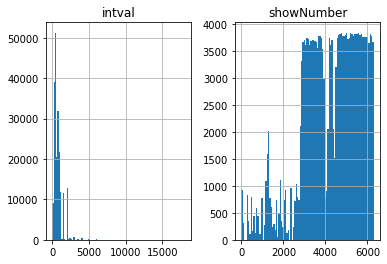

In [253]:
data.hist(by=None, bins=100)

array([[<AxesSubplot:title={'center':'intval'}>]], dtype=object)

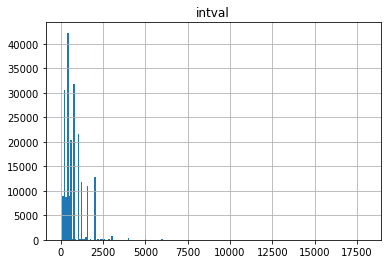

In [254]:
data.hist(column='intval', bins=200)


In [255]:
data['intval'].isnull().sum()

3634

delete all rows where the question value is NaN

In [256]:
data.dropna(subset = ["intval"], inplace=True)
data['intval'].isnull().sum()

0

In [257]:
data

,category,air_date,question,answer,round,intval,showNumber
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",Copernicus,Jeopardy!,200.0,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,Jim Thorpe,Jeopardy!,200.0,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,Arizona,Jeopardy!,200.0,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",McDonald\'s,Jeopardy!,200.0,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",John Adams,Jeopardy!,200.0,4680
...,...,...,...,...,...,...,...
216924,OFF-BROADWAY,2006-05-11,'In 2006 the cast of this long-running hit emb...,Stomp,Double Jeopardy!,2000.0,4999
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,Turandot,Double Jeopardy!,2000.0,4999
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,a titmouse,Double Jeopardy!,2000.0,4999
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",Clive Barker,Double Jeopardy!,2000.0,4999


array([[<AxesSubplot:title={'center':'intval'}>]], dtype=object)

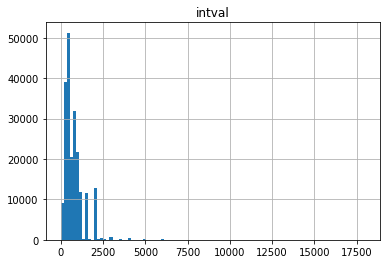

In [258]:
data.hist(column='intval', bins=100)


In [259]:
data.nunique()

category       26951
air_date        3640
question      212499
answer         87162
round              2
intval           145
showNumber      3640
dtype: int64

Delete the rows with questions values that are not 400, 800, 1200, 1600, 2000 cause these are the standard questions. Values out side this are daily double questions where the player bets from their existing winnings to give the value to the question therefore the question cannot be a predictor or the value. 
https://datagenetics.com/blog/september12012/index.html
We also know that all final jeopardy values are NaN as this is a betting phase in the game. 

From Wiki, the 1984 series' first-round originally ranged from $100-$500 (doubled again from the second pilot) and was doubled to $200–$1,000 on November 26, 2001.

In [260]:
array = [200, 400, 600, 800, 1000, 1200, 1600, 2000]
data = data.loc[data['intval'].isin(array)]
data.nunique()
data.shape


(182217, 7)

Looks like they introduce more 1200 and 1600 dollar questions after show 3000

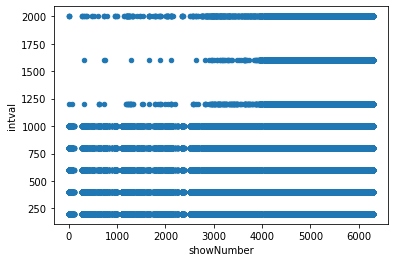

In [261]:
data.plot.scatter(x="showNumber", y="intval");

No correlation between air date and value which makes sense as every game has questions at the values
200, 400, 600, 800, 1000, 1200, 1600, 2000
https://datagenetics.com/blog/september12012/index.html

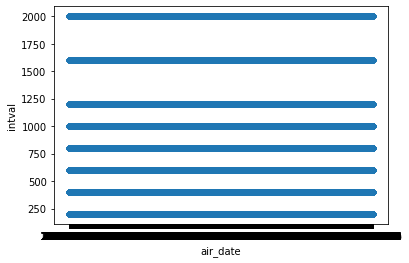

In [262]:
data.plot.scatter(x="air_date", y="intval");

No correlation between category and value. 

In [263]:
#data.plot.scatter(x="category", y="intval");

Create a features

In [264]:
data ["length of question"]= data['question'].str.len()

<ipython-input-264-b6857baec926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ["length of question"]= data['question'].str.len()


In [265]:
data

,category,air_date,question,answer,round,intval,showNumber,length of question
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",Copernicus,Jeopardy!,200.0,4680,98
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,Jim Thorpe,Jeopardy!,200.0,4680,109
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,Arizona,Jeopardy!,200.0,4680,90
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",McDonald\'s,Jeopardy!,200.0,4680,86
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",John Adams,Jeopardy!,200.0,4680,106
...,...,...,...,...,...,...,...,...
216924,OFF-BROADWAY,2006-05-11,'In 2006 the cast of this long-running hit emb...,Stomp,Double Jeopardy!,2000.0,4999,177
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,Turandot,Double Jeopardy!,2000.0,4999,76
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,a titmouse,Double Jeopardy!,2000.0,4999,105
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",Clive Barker,Double Jeopardy!,2000.0,4999,107


length of question inlcuding stop words shows no correleation with value

<AxesSubplot:xlabel='intval', ylabel='length of question'>

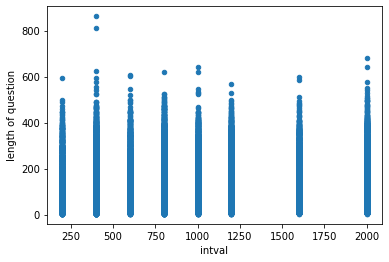

In [266]:
data.plot.scatter(x="intval", y="length of question")

create a feature

In [267]:
data ["length of answer"]= data['answer'].str.len()

<ipython-input-267-2bce1e7891fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ["length of answer"]= data['answer'].str.len()


In [268]:
data

,category,air_date,question,answer,round,intval,showNumber,length of question,length of answer
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",Copernicus,Jeopardy!,200.0,4680,98,10
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,Jim Thorpe,Jeopardy!,200.0,4680,109,10
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,Arizona,Jeopardy!,200.0,4680,90,7
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",McDonald\'s,Jeopardy!,200.0,4680,86,11
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",John Adams,Jeopardy!,200.0,4680,106,10
...,...,...,...,...,...,...,...,...,...
216924,OFF-BROADWAY,2006-05-11,'In 2006 the cast of this long-running hit emb...,Stomp,Double Jeopardy!,2000.0,4999,177,5
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,Turandot,Double Jeopardy!,2000.0,4999,76,8
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,a titmouse,Double Jeopardy!,2000.0,4999,105,10
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",Clive Barker,Double Jeopardy!,2000.0,4999,107,12


<AxesSubplot:xlabel='length of answer', ylabel='intval'>

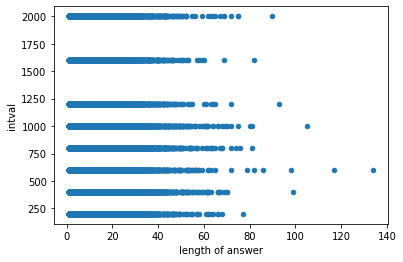

In [269]:
data.plot.scatter(x="length of answer", y="intval")

In [270]:
import nltk

In [271]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Could a question with more stopwords be more complicated therfore have a higher value? Below, i count the stopwords

In [272]:
from nltk.corpus import stopwords    
stop_words = set(stopwords.words('english'))

data['count of stopwords in question'] = data['question'].str.split().apply(lambda x: len(set(x) & stop_words))


<ipython-input-272-9e2314fca0d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count of stopwords in question'] = data['question'].str.split().apply(lambda x: len(set(x) & stop_words))


In [273]:
data.head()

,category,air_date,question,answer,round,intval,showNumber,length of question,length of answer,count of stopwords in question
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",Copernicus,Jeopardy!,200.0,4680,98,10,7
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,Jim Thorpe,Jeopardy!,200.0,4680,109,10,3
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,Arizona,Jeopardy!,200.0,4680,90,7,6
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",McDonald\'s,Jeopardy!,200.0,4680,86,11,3
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",John Adams,Jeopardy!,200.0,4680,106,10,2


Below monetary value does not increase with stopwords 

<AxesSubplot:xlabel='count of stopwords in question', ylabel='intval'>

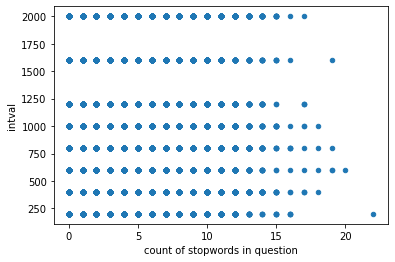

In [274]:
data.plot.scatter(x="count of stopwords in question", y="intval")

In [275]:
col_1 = data['count of stopwords in question']
col_2 = data['intval']
correlation = col_1.corr(col_2) 
print(correlation)

0.04543691449964114


Tom, two ways to go were regression but i don't see the correlations and i don't 
think encoding the language and looking for correlatons is going to work. 
The other way is to treat the 8 values i am focused on as labels and then do a multi-output regression(multi-class classification) 
(same as i did for procurement project that i explained in the interview) 
However, i don't see how we are going to get distinct unigrams, bigrams (in the questions) that are highly 
correlated with the label(value) that we train on and when we test, it will be relevant.




Correlation between question value and mean of all question lengths with that value. However, this doesn't help me precit value cause i would need to add the mean of my question to the mean of the all questions of the correct value.

In [276]:
newData= data.groupby('intval', as_index=False)['length of question'].mean()
newData

,intval,length of question
0,200.0,81.764998
1,400.0,86.373260
2,600.0,88.194091
3,800.0,90.939893
4,1000.0,91.237384
5,1200.0,98.339874
6,1600.0,95.541395
7,2000.0,101.048328


<AxesSubplot:xlabel='intval', ylabel='length of question'>

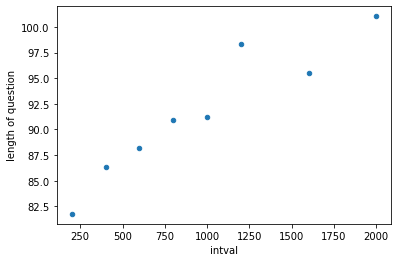

In [277]:
newData.plot.scatter(x="intval", y="length of question")

Correlation with mean of all length of answers for that value so if i am asked a question and i have more than one possible response. 
I can compare the mean of each question (/2) against the following table and select the closest. Again, this does not help us predict value. 

In [278]:
newDataA= data.groupby('intval', as_index=False)['length of answer'].mean()
newDataA

,intval,length of answer
0,200.0,10.855787
1,400.0,11.184902
2,600.0,11.481376
3,800.0,11.473446
4,1000.0,12.156839
5,1200.0,11.600748
6,1600.0,11.744293
7,2000.0,12.160652


In [279]:


newDataB= data.groupby('intval', as_index=False)['count of stopwords in question'].mean()
newDataB

,intval,count of stopwords in question
0,200.0,4.109210
1,400.0,4.200715
2,600.0,4.220101
3,800.0,4.302323
4,1000.0,4.307763
5,1200.0,4.458801
6,1600.0,4.384601
7,2000.0,4.488425


<AxesSubplot:xlabel='intval', ylabel='count of stopwords in question'>

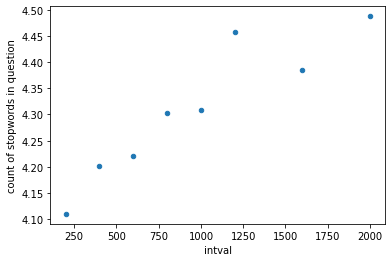

In [280]:
newDataB.plot.scatter(x="intval", y="count of stopwords in question")

Everything below is where i am trying to fit a square peg into a round whole trying to use the above correlations to build model that clearly doesn't work

In [281]:
#data200 = data[data.intval == 200]

data.groupby(['intval']).count()


#rows = np.random.choice(df.index.values, 5)

,category,air_date,question,answer,round,showNumber,length of question,length of answer,count of stopwords in question
intval,,,,,,,,,
200.0,30455,30455,30455,30455,30455,30455,30455,30455,30455
400.0,42244,42244,42244,42244,42244,42244,42244,42244,42244
600.0,20377,20377,20377,20377,20377,20377,20377,20377,20377
800.0,31860,31860,31860,31860,31860,31860,31860,31860,31860
1000.0,21640,21640,21640,21640,21640,21640,21640,21640,21640
1200.0,11772,11772,11772,11772,11772,11772,11772,11772,11772
1600.0,11040,11040,11040,11040,11040,11040,11040,11040,11040
2000.0,12829,12829,12829,12829,12829,12829,12829,12829,12829


In [282]:
#data = data.drop(['showNumber','round','air_date', 'category'], axis=1)
data =data.drop(['length of question', 'length of answer'], axis =1)
df_ = data.groupby('intval')
df_.describe().head()

showNumber                                                           \
            count         mean          std  min      25%     50%      75%   
intval                                                                       
200.0     30455.0  3867.944246  1423.615325  1.0  3079.00  3738.0  5025.00   
400.0     42244.0  4284.362205  1381.015602  1.0  3370.75  4516.0  5405.00   
600.0     20377.0  4290.621632  1379.947076  1.0  3371.00  4526.0  5411.00   
800.0     31860.0  4653.973666  1231.787949  1.0  3984.00  4888.0  5590.00   
1000.0    21640.0  4282.200000  1380.479619  1.0  3369.00  4511.0  5400.25   

               count of stopwords in question                                \
           max                          count      mean       std  min  25%   
intval                                                                        
200.0   6300.0                        30455.0  4.109210  2.217079  0.0  3.0   
400.0   6300.0                        42244.0  4.200715  2.288649  0.0  3.0   
600.0   6300.0                        20377.0  4.220101  2.283584  0.0  3.0   
800.0   6300.0                        31860.0  4.302323  2.339228  0.0  3.0   
1000.0  6300.0                        21640.0  4.307763  2.275131  0.0  3.0   

                        
        50%  75%   max  
intval                  
200.0   4.0  6.0  22.0  
400.0   4.0  6.0  18.0  
600.0   4.0  6.0  20.0  
800.0   4.0  6.0  19.0  
1000.0  4.0  6.0  18.0

In [283]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt 


In [284]:
#data_features = pd.DataFrame(newDataB)

In [285]:
data['mean of stopwords'] = data['count of stopwords in question']/2
data

,category,air_date,question,answer,round,intval,showNumber,count of stopwords in question,mean of stopwords
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",Copernicus,Jeopardy!,200.0,4680,7,3.5
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,Jim Thorpe,Jeopardy!,200.0,4680,3,1.5
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,Arizona,Jeopardy!,200.0,4680,6,3.0
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",McDonald\'s,Jeopardy!,200.0,4680,3,1.5
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",John Adams,Jeopardy!,200.0,4680,2,1.0
...,...,...,...,...,...,...,...,...,...
216924,OFF-BROADWAY,2006-05-11,'In 2006 the cast of this long-running hit emb...,Stomp,Double Jeopardy!,2000.0,4999,6,3.0
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,Turandot,Double Jeopardy!,2000.0,4999,4,2.0
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,a titmouse,Double Jeopardy!,2000.0,4999,7,3.5
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",Clive Barker,Double Jeopardy!,2000.0,4999,4,2.0


In [292]:

# dataNew = data.head(int(len(data)*(80/100)))
# dataNew.shape



In [293]:
dataNewA = data.iloc[145773:182217]

dataNewA.shape

(36444, 9)

In [294]:
# I will train on newDataC or train on DataNew and test on dataNewA

In [295]:
newDataC= dataNew.groupby('intval', as_index=False)['count of stopwords in question'].mean()

# dataNew = dataNew.reset_index()
# dataNew.columns[0] = 'Index1'
# dataNew['index'] = dataNew.index + 145773

# newDataC= dataNew.groupby('Index')['count of stopwords in question'].mean()
newDataC


,intval,count of stopwords in question
0,200.0,4.114169
1,400.0,4.196800
2,600.0,4.207283
3,800.0,4.304517
4,1000.0,4.295330
5,1200.0,4.457070
6,1600.0,4.377476
7,2000.0,4.509109


In [296]:
data

,category,air_date,question,answer,round,intval,showNumber,count of stopwords in question,mean of stopwords
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",Copernicus,Jeopardy!,200.0,4680,7,3.5
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,Jim Thorpe,Jeopardy!,200.0,4680,3,1.5
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,Arizona,Jeopardy!,200.0,4680,6,3.0
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",McDonald\'s,Jeopardy!,200.0,4680,3,1.5
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",John Adams,Jeopardy!,200.0,4680,2,1.0
...,...,...,...,...,...,...,...,...,...
216924,OFF-BROADWAY,2006-05-11,'In 2006 the cast of this long-running hit emb...,Stomp,Double Jeopardy!,2000.0,4999,6,3.0
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,Turandot,Double Jeopardy!,2000.0,4999,4,2.0
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,a titmouse,Double Jeopardy!,2000.0,4999,7,3.5
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",Clive Barker,Double Jeopardy!,2000.0,4999,4,2.0


In [303]:
# x = dataNew['mean of stopwords'].values.reshape(-1,1)
# y = dataNew['intval']
# plt.scatter(x, y)

# train_X = dataNew['mean of stopwords'].values.reshape(-1,1)
# train_Y =  dataNew['intval']

# test_x = dataNewA['mean of stopwords'].values.reshape(-1,1)
# test_T = dataNew['intval']

X = data['mean of stopwords'].values.reshape(-1,1)

Y = data['intval']

train_X, test_X, train_Y, test_Y= train_test_split(X, Y, test_size=0.2)
train_X

array([[2. ],
       [2.5],
       [3. ],
       ...,
       [2.5],
       [0. ],
       [4. ]])

In [304]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [305]:
clf.fit(train_X,train_Y)

LinearRegression()

In [307]:
clf.predict(test_X)

array([734.53597202, 724.78924898, 744.28269507, ..., 754.02941811,
       793.0163103 , 754.02941811])

In [308]:
clf.score(test_X, test_Y)

0.002222852441268186

In [315]:
# x = dataNew['mean of stopwords'].values.reshape(-1,1)
# y = dataNew['intval']
# plt.scatter(x, y)

# train_X = dataNew['mean of stopwords'].values.reshape(-1,1)
# train_Y =  dataNew['intval']



train_X = newDataC['count of stopwords in question'].values.reshape(-1,1)
train_Y = newDataC['intval']

test_X = dataNewA['mean of stopwords'].values.reshape(-1,1)
test_Y = dataNewA['intval']


# train_X, test_X, train_Y, test_Y= train_test_split(X, Y, test_size=0.2)
train_X


array([[4.11416855],
       [4.19680033],
       [4.20728343],
       [4.30451674],
       [4.29532959],
       [4.4570699 ],
       [4.37747595],
       [4.50910862]])

In [316]:
clf.fit(train_X,train_Y)

LinearRegression()

In [317]:
clf.predict(test_X)

array([-2409.76989205, -8695.56231588, -4505.03403332, ...,
       -2409.76989205, -8695.56231588, -2409.76989205])

In [318]:
clf.score(test_X, test_Y)

-401.3545912069275